In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\Oladeji\\Documents\\sales datasets.csv')
df.head()

,Sales Person,Geography,Product,Amount,Customers
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459
2,Husein Augar,USA,Almond Choco,$959,147
3,Carla Molina,Canada,Drinking Coco,"$9,632",288
4,Curtice Advani,UK,White Choc,"$2,100",414


In [6]:
df.shape

(716, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  716 non-null    object
 1   Geography     716 non-null    object
 2   Product       716 non-null    object
 3   Amount        716 non-null    object
 4   Customers     716 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 28.1+ KB


In [184]:
revenue = df['Amount'].sum()

In [15]:
df.isna().sum()

Sales Person    0
Geography       0
Product         0
Amount          0
Customers       0
dtype: int64

In [23]:
df['Amount'] = df['Amount'].str.replace('$', '')

C:\Users\Oladeji\AppData\Local\Temp\ipykernel_15556\3309945328.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('$', '')


In [177]:
df.head()

,Sales Person,Geography,Product,Amount,Customers
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459
2,Husein Augar,USA,Almond Choco,959.0,147
3,Carla Molina,Canada,Drinking Coco,9632.0,288
4,Curtice Advani,UK,White Choc,2100.0,414


In [181]:
total_num_of_product = np.size(df['Product'].unique())
total_num_of_product

22

In [248]:
num_of_salesperson_per_country = df.groupby('Geography')['Sales Person'].count().sort_values().reset_index()
print(num_of_salesperson_per_country)

     Geography  Sales Person
0           UK           111
1    Australia           116
2          USA           119
3       Canada           122
4        India           124
5  New Zealand           124


In [40]:
top_salesperson = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
top_salesperson.head(10).reset_index()

,Sales Person,Amount
0,Gigi Bohling,312753.0
1,Curtice Advani,311129.0
2,Carla Molina,303982.0
3,Brien Boise,300146.0
4,Ram Mahesh,297003.0
5,Ches Bonnell,295225.0
6,Gunar Cockshoot,291053.0
7,Barr Faughny,283710.0
8,Oby Sorrel,269899.0
9,Husein Augar,262717.0


In [31]:
df['Amount'] = df['Amount'].str.replace(',', '')

In [32]:
df

,Sales Person,Geography,Product,Amount,Customers
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114
1,Brien Boise,USA,Choco Coated Almonds,6706,459
2,Husein Augar,USA,Almond Choco,959,147
3,Carla Molina,Canada,Drinking Coco,9632,288
4,Curtice Advani,UK,White Choc,2100,414
...,...,...,...,...,...
711,Ram Mahesh,India,Drinking Coco,5054,309
712,Husein Augar,New Zealand,70% Dark Bites,3808,162
713,Ram Mahesh,Australia,Fruit & Nut Bars,84,126
714,Curtice Advani,USA,Smooth Sliky Salty,4109,24


<AxesSubplot:xlabel='Sales Person'>

<Figure size 576x720 with 0 Axes>

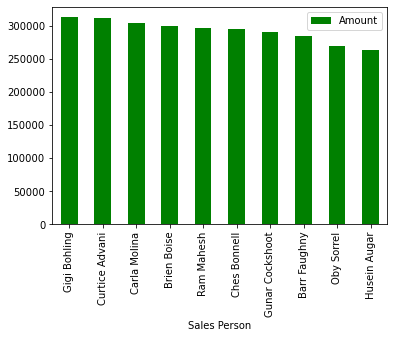

In [85]:
ax= plt.figure(figsize=(8,10))
top_salesperson.head(10).reset_index().plot(kind= 'bar', x='Sales Person', y='Amount', color='green')

In [36]:
df['Amount'] = df['Amount'].astype(float)

In [38]:
revenue = df['Amount'].sum()
revenue

2927617.0

In [86]:
country_with_higher_revenue = df.groupby('Geography')['Amount'].sum().sort_values(ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

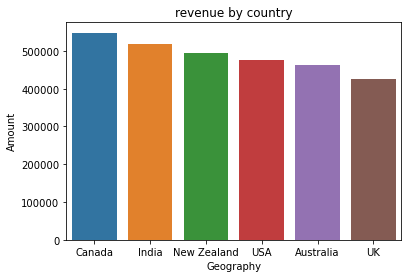

In [91]:
plt = sns.barplot(x='Geography', y='Amount', data=country_with_higher_revenue)
pl.title('revenue by country')
pl.show

In [92]:
df

,Sales Person,Geography,Product,Amount,Customers
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459
2,Husein Augar,USA,Almond Choco,959.0,147
3,Carla Molina,Canada,Drinking Coco,9632.0,288
4,Curtice Advani,UK,White Choc,2100.0,414
...,...,...,...,...,...
711,Ram Mahesh,India,Drinking Coco,5054.0,309
712,Husein Augar,New Zealand,70% Dark Bites,3808.0,162
713,Ram Mahesh,Australia,Fruit & Nut Bars,84.0,126
714,Curtice Advani,USA,Smooth Sliky Salty,4109.0,24


In [94]:
top_selling_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).reset_index()
top_selling_product.head(5)

,Product,Amount
0,Mint Chip Choco,182966.0
1,Drinking Coco,169365.0
2,Organic Choco Syrup,162687.0
3,Caramel Stuffed Bars,155281.0
4,Eclairs,151396.0


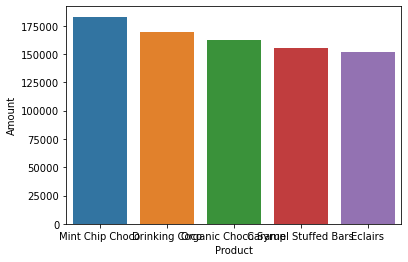

In [287]:
plt = sns.barplot(x="Product", y="Amount", data = top_selling_product.head(5), linewidth=2)
pl.show(

In [119]:
salesperson_with_higher_customer = df.groupby('Sales Person')['Customers'].count().sort_values(ascending=False).reset_index()
salesperson_with_higher_customer

,Sales Person,Customers
0,Barr Faughny,77
1,Curtice Advani,77
2,Carla Molina,76
3,Gigi Bohling,74
4,Ches Bonnell,72
5,Ram Mahesh,72
6,Husein Augar,70
7,Oby Sorrel,67
8,Brien Boise,66
9,Gunar Cockshoot,65


In [190]:
df['Patronize'] = df['Customers'].value_counts()
df

,Sales Person,Geography,Product,Amount,Customers,patronize,Patronize
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114,4.0,4.0
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459,NaN,NaN
2,Husein Augar,USA,Almond Choco,959.0,147,NaN,NaN
3,Carla Molina,Canada,Drinking Coco,9632.0,288,12.0,12.0
4,Curtice Advani,UK,White Choc,2100.0,414,NaN,NaN
...,...,...,...,...,...,...,...
711,Ram Mahesh,India,Drinking Coco,5054.0,309,NaN,NaN
712,Husein Augar,New Zealand,70% Dark Bites,3808.0,162,NaN,NaN
713,Ram Mahesh,Australia,Fruit & Nut Bars,84.0,126,NaN,NaN
714,Curtice Advani,USA,Smooth Sliky Salty,4109.0,24,NaN,NaN


In [124]:
customer = df['Customers'].unique()
customer

array([114, 459, 147, 288, 414, 432,  54, 210,  75,  12, 462, 144, 120,
       234,  66,  87, 339, 162,  90, 141, 204, 186, 231, 168, 195,  15,
        30, 102, 183,  72, 282, 405, 135,  21, 153, 255,  18, 189,  36,
       156,  39,  63,  69, 504, 273,  48, 207,   9, 261,   6, 138, 111,
       525, 150, 492, 165, 309, 159, 201,  51, 279, 123,  81, 228, 342,
       216,  93, 312, 300, 519,  96, 192, 225, 456, 252, 240, 129, 303,
       246,  84, 348, 258,  27, 213, 357, 174, 510, 378, 117, 126,  42,
       366, 324, 243, 447, 297, 177, 306, 219, 171, 276,  45, 369, 372,
       105,   0, 270,   3, 198, 249,  60,  78,  57, 402, 327,  99, 363,
       237,  24, 333, 354, 384, 264, 108, 477, 423, 180, 516, 435, 294,
        33, 132, 453, 345, 222, 267, 315, 336, 549, 330, 438, 411, 318,
       285, 429, 390], dtype=int64)

In [262]:
nu = df.groupby('Geography')['Product'].unique().reset_index()
nu

,Geography,Product
0,Australia,"[Smooth Sliky Salty, 50% Dark Bites, Mint Chip..."
1,Canada,"[Drinking Coco, Milk Bars, Fruit & Nut Bars, M..."
2,India,"[Milk Bars, Orange Choco, After Nines, Fruit &..."
3,New Zealand,"[70% Dark Bites, 50% Dark Bites, Eclairs, Smoo..."
4,UK,"[White Choc, Orange Choco, Mint Chip Choco, 70..."
5,USA,"[Choco Coated Almonds, Almond Choco, Peanut Bu..."


In [193]:
df['Patronize'] = df['Patronize'].fillna(0)
df

,Sales Person,Geography,Product,Amount,Customers,patronize,Patronize
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114,4.0,4.0
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459,NaN,0.0
2,Husein Augar,USA,Almond Choco,959.0,147,NaN,0.0
3,Carla Molina,Canada,Drinking Coco,9632.0,288,12.0,12.0
4,Curtice Advani,UK,White Choc,2100.0,414,NaN,0.0
...,...,...,...,...,...,...,...
711,Ram Mahesh,India,Drinking Coco,5054.0,309,NaN,0.0
712,Husein Augar,New Zealand,70% Dark Bites,3808.0,162,NaN,0.0
713,Ram Mahesh,Australia,Fruit & Nut Bars,84.0,126,NaN,0.0
714,Curtice Advani,USA,Smooth Sliky Salty,4109.0,24,NaN,0.0


In [194]:
df.drop(columns=['patronize'], inplace=True)

In [195]:
df

,Sales Person,Geography,Product,Amount,Customers,Patronize
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114,4.0
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459,0.0
2,Husein Augar,USA,Almond Choco,959.0,147,0.0
3,Carla Molina,Canada,Drinking Coco,9632.0,288,12.0
4,Curtice Advani,UK,White Choc,2100.0,414,0.0
...,...,...,...,...,...,...
711,Ram Mahesh,India,Drinking Coco,5054.0,309,0.0
712,Husein Augar,New Zealand,70% Dark Bites,3808.0,162,0.0
713,Ram Mahesh,Australia,Fruit & Nut Bars,84.0,126,0.0
714,Curtice Advani,USA,Smooth Sliky Salty,4109.0,24,0.0


In [197]:
df.head(15)

,Sales Person,Geography,Product,Amount,Customers,Patronize
0,Ram Mahesh,New Zealand,70% Dark Bites,1624.0,114,4.0
1,Brien Boise,USA,Choco Coated Almonds,6706.0,459,0.0
2,Husein Augar,USA,Almond Choco,959.0,147,0.0
3,Carla Molina,Canada,Drinking Coco,9632.0,288,12.0
4,Curtice Advani,UK,White Choc,2100.0,414,0.0
5,Ram Mahesh,USA,Peanut Butter Cubes,8869.0,432,0.0
6,Curtice Advani,Australia,Smooth Sliky Salty,2681.0,54,7.0
7,Brien Boise,USA,After Nines,5012.0,210,0.0
8,Ches Bonnell,Australia,50% Dark Bites,1281.0,75,0.0
9,Gigi Bohling,New Zealand,50% Dark Bites,4991.0,12,12.0


In [200]:
num = df[['Geography', 'Customers', 'Product', 'Patronize']].nlargest(n=10, columns='Patronize')
num

,Geography,Customers,Product,Patronize
75,Canada,165,Fruit & Nut Bars,14.0
123,USA,300,Organic Choco Syrup,14.0
204,New Zealand,54,50% Dark Bites,13.0
3,Canada,288,Drinking Coco,12.0
9,New Zealand,12,50% Dark Bites,12.0
39,India,135,Organic Choco Syrup,12.0
54,USA,69,Milk Bars,12.0
87,Canada,162,Caramel Stuffed Bars,12.0
42,India,15,Raspberry Choco,11.0
48,India,75,Manuka Honey Choco,11.0


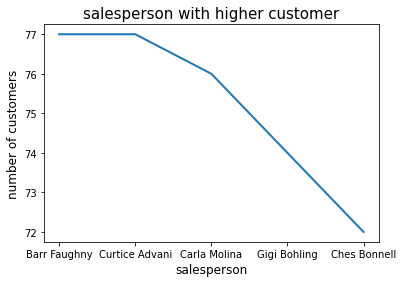

In [274]:
sns.lineplot(x='Sales Person', y='Customers', data=salesperson_with_higher_customer.head(5), linewidth=2)
pl.title('salesperson with higher customer', fontsize=15)
pl.xlabel('salesperson', fontsize=12)
pl.ylabel('number of customers', fontsize=12)
pl.show()

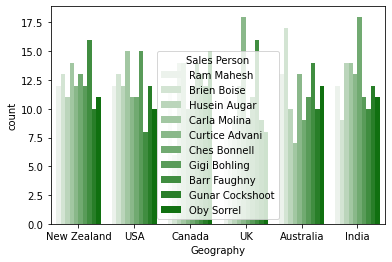

In [285]:
sns.countplot(x='Geography', hue='Sales Person', data=df, color='green')
pl.show()

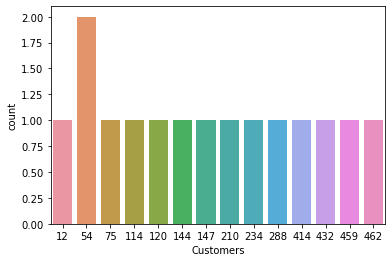

In [289]:
sns.countplot(x='Customers', data=df.head(15))
pl.show()

In [303]:
no = df.groupby('Geography')['Sales Person'].count()
no

Geography
Australia      116
Canada         122
India          124
New Zealand    124
UK             111
USA            119
Name: Sales Person, dtype: int64

In [308]:
con_matrix = df.corr(method='pearson')
con_matrix

,Amount,Customers,Patronize
Amount,1.000000,0.033216,-0.043104
Customers,0.033216,1.000000,-0.045267
Patronize,-0.043104,-0.045267,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

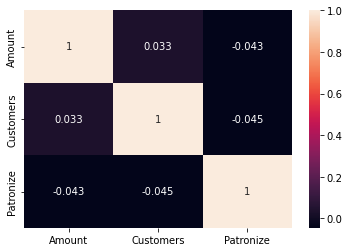

In [310]:
sns.heatmap(con_matrix, annot=True)
pl.show